In [3]:
# getting mocap data
from support.funcs import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Session Directory
pth=r"C:\Users\arpan\OneDrive\Documents\internship\rec_program\savdir\Session_27-06-23_11-29-04_3971"


df_mocap,starttime=read_df_csv(r'C:\Users\arpan\OneDrive\Documents\internship\mocapcsv\arpan_t2.csv')

# converting to epoch time
epoch_time = starttime.timestamp() 
time=df_mocap['seconds'].to_numpy()
time=time+epoch_time
df_mocap.insert(1,'epoch_time',time)
df_mocap.columns

Index(['seconds', 'epoch_time', 'le_x', 'le_y', 'le_z', 'ls_x', 'ls_y', 'ls_z',
       'lw_x', 'lw_y', 'lw_z', 're_x', 're_y', 're_z', 'rs_x', 'rs_y', 'rs_z',
       'rw_x', 'rw_y', 'rw_z', 'tr_x', 'tr_y', 'tr_z'],
      dtype='object')

In [4]:
# getting mpipe data
df_mpipe=pd.read_csv(pth+'\mpipe.csv')
df_mpipe

,epoch_time,LS_x,LS_y,LS_z,LE_x,LE_y,LE_z,LW_x,LW_y,LW_z,...,RS_z,RE_x,RE_y,RE_z,RW_x,RW_y,RW_z,TR_x,TR_y,TR_z
0,1.687846e+09,0.123275,-0.363903,1.759,0.165056,0.037661,1.735,0.179207,0.36176,1.595,...,1.730,-0.413429,0.050239,1.701,-0.434044,0.371196,1.582,-0.111364,-0.287746,1.684
1,1.687846e+09,0.134062,-0.374280,1.756,0.165056,0.037661,1.735,0.179207,0.36176,1.595,...,1.738,-0.413429,0.050239,1.701,-0.434044,0.371196,1.582,-0.106280,-0.293541,1.687
2,1.687846e+09,0.151329,-0.384488,1.765,0.165056,0.037661,1.735,0.179207,0.36176,1.595,...,1.753,-0.413429,0.050239,1.701,-0.434044,0.371196,1.582,-0.095885,-0.302001,1.690
3,1.687846e+09,0.156589,-0.389352,1.762,0.165056,0.037661,1.735,0.179207,0.36176,1.595,...,1.762,-0.413429,0.050239,1.701,-0.434044,0.371196,1.582,-0.090271,-0.306202,1.684
4,1.687846e+09,0.165146,-0.392779,1.765,0.165056,0.037661,1.735,0.179207,0.36176,1.595,...,1.753,-0.413429,0.050239,1.701,-0.434044,0.371196,1.582,-0.084291,-0.308886,1.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.687846e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,1.687846e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,1.687846e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,1.687846e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def pvt(x,t):
    from scipy.signal import savgol_filter
    y=[]
    for i in x:
        y.append(i)
    w = savgol_filter(y,  21,3)
    plt.plot(t,w)
    # plt.ylim(-1,1)
    plt.xlabel('time(s)')

    

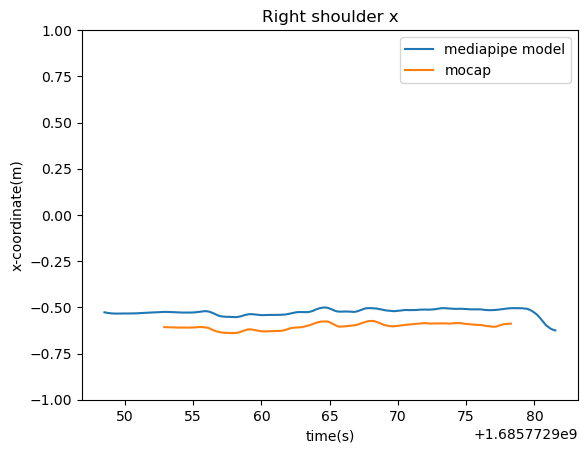

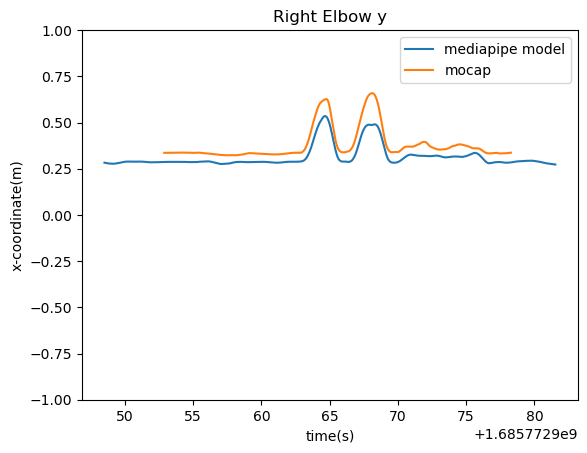

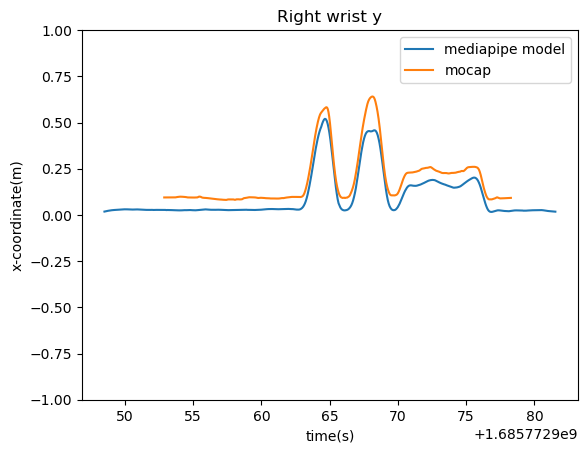

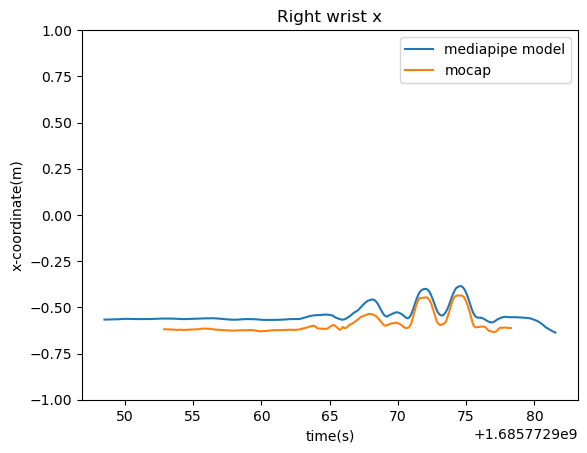

In [8]:
# position test plot
pvt(df_mpipe['RS_x'].to_numpy(),df_mpipe['epoch_time'])
# pvt(df_mocap['RS_x'].to_numpy(),df_mocap['epoch_time'])
plt.ylabel('x-coordinate(m)')
plt.legend(['mediapipe model','mocap'])
plt.title('Right shoulder x')
plt.ylim(-1,1)
plt.show()

pvt(df_mpipe['re_y'].to_numpy(),df_mpipe['epoch_time'])
# pvt(df_mocap['RE_y'].to_numpy(),df_mocap['epoch_time'])
plt.ylabel('x-coordinate(m)')
plt.legend(['mediapipe model','mocap'])
plt.title('Right Elbow y')
plt.ylim(-1,1)
plt.show()

# pvt(df_mpipe['RE_z'].to_numpy(),df_mpipe['epoch_time'])
# pvt(df_mocap['RE_z'].to_numpy(),df_mocap['epoch_time'])
# plt.ylabel('x-coordinate(m)')
# plt.legend(['mediapipe model','mocap'])
# plt.title('Right Elbow z')
# plt.ylim(-1,1)
# plt.show()

pvt(df_mpipe['RW_y'].to_numpy(),df_mpipe['epoch_time'])
pvt(df_mocap['RW_y'].to_numpy(),df_mocap['epoch_time'])
plt.ylabel('x-coordinate(m)')
plt.legend(['mediapipe model','mocap'])
plt.title('Right wrist y')
plt.ylim(-1,1)
plt.show()

pvt(df_mpipe['RW_x'].to_numpy(),df_mpipe['epoch_time'])
pvt(df_mocap['RW_x'].to_numpy(),df_mocap['epoch_time'])
plt.ylabel('x-coordinate(m)')
plt.legend(['mediapipe model','mocap'])
plt.title('Right wrist x')
plt.ylim(-1,1)
plt.show()

In [8]:
# Calculating the elbow angle using mediapipe and mocap data
mpipeRightElbowAngle, mocapRightElbowAngle = [], []

# Calculate right elbow angle using mediapipe data
for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeRightElbowAngle.append(angle3point([df_mpipe['RS_x'][i], df_mpipe['RS_y'][i], df_mpipe['RS_z'][i]],
                                            [df_mpipe['RE_x'][i], df_mpipe['RE_y'][i], df_mpipe['RE_z'][i]],
                                            [df_mpipe['RW_x'][i], df_mpipe['RW_y'][i], df_mpipe['RW_z'][i]]))

# Calculate right elbow angle using mocap data
# for i in range(len(df_mocap['epoch_time'].tolist())):
#     mocapRightElbowAngle.append(angle3point([df_mocap['RS_x'][i], df_mocap['RS_y'][i], df_mocap['RS_z'][i]],
#                                             [df_mocap['RE_x'][i], df_mocap['RE_y'][i], df_mocap['RE_z'][i]],
#                                             [df_mocap['RW_x'][i], df_mocap['RW_y'][i], df_mocap['RW_z'][i]]))

mpipeLeftElbowAngle, mocapLeftElbowAngle = [], []

# Calculate left elbow angle using mediapipe data
for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeLeftElbowAngle.append(angle3point([df_mpipe['LS_x'][i], df_mpipe['LS_y'][i], df_mpipe['LS_z'][i]],
                                           [df_mpipe['LE_x'][i], df_mpipe['LS_y'][i], df_mpipe['LE_z'][i]],
                                           [df_mpipe['LW_x'][i], df_mpipe['LS_y'][i], df_mpipe['LW_z'][i]]))

# Calculate left elbow angle using mocap data
# for i in range(len(df_mocap['epoch_time'].tolist())):
#     mocapLeftElbowAngle.append(angle3point([df_mocap['LS_x'][i], df_mocap['LS_y'][i], df_mocap['LS_z'][i]],
#                                            [df_mocap['LE_x'][i], df_mocap['LE_y'][i], df_mocap['LE_z'][i]],
#                                            [df_mocap['LE_x'][i], df_mocap['LW_y'][i], df_mocap['LW_z'][i]]))

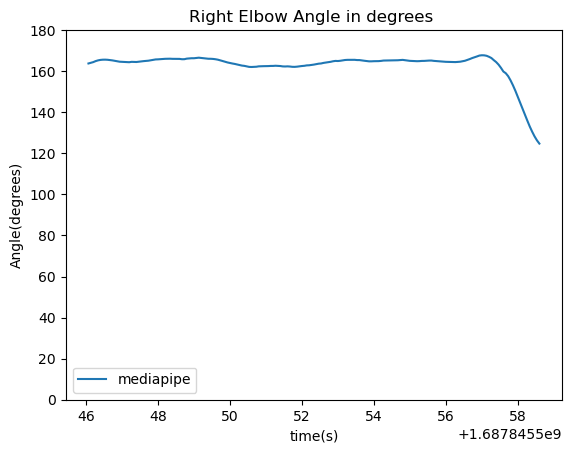

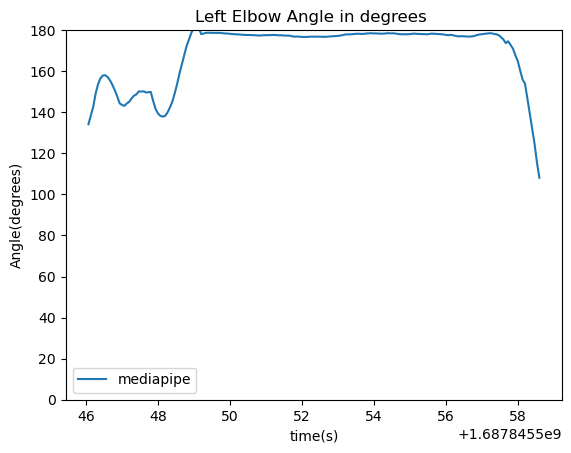

In [14]:
#test graph right elbow angle 
pvt(mpipeRightElbowAngle,df_mpipe['epoch_time'])
# pvt(mocapRightElbowAngle,df_mocap['epoch_time'])
plt.title('Right Elbow Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
plt.legend(['mediapipe','mocap'])
plt.ylim(0,180)
plt.show()

# print('RMSE of Right Elbow Angle:',RMSE(mocapRightElbowAngle,mpipeRightElbowAngle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

#test graph left elbow angle 
pvt(mpipeLeftElbowAngle,df_mpipe['epoch_time'])
# pvt(mocapLeftElbowAngle,df_mocap['epoch_time'])
plt.title('Left Elbow Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
plt.legend(['mediapipe','mocap'])
plt.ylim(0,180)
plt.show()


# print('RMSE of Left Elbow Angle:',RMSE(mocapLeftElbowAngle,mpipeLeftElbowAngle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

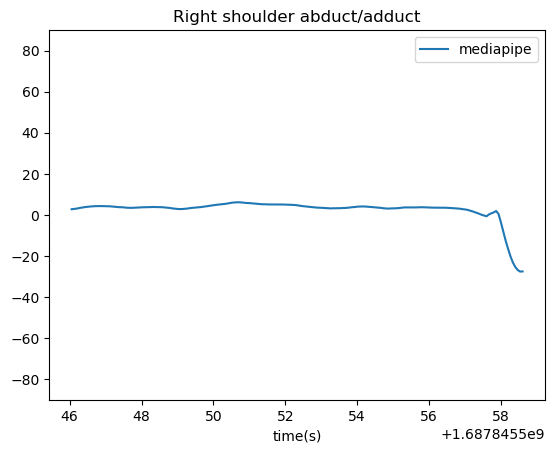

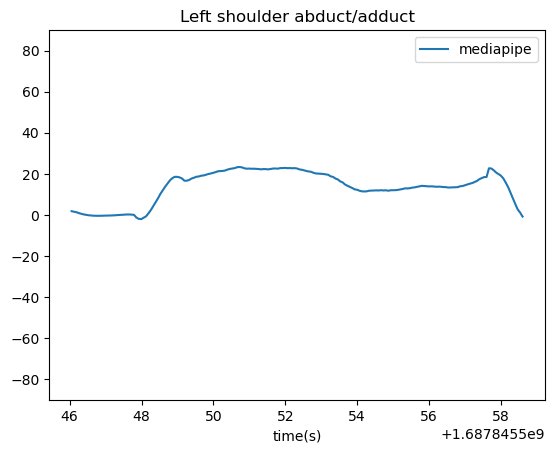

In [17]:
#adductangle project elbow point on frontal plane formed by tr,ls,rs then find angle between shoulder and porject and subtract 90degrees
mpipeRightaductangle=[]
mocapRightaductangle=[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    projection=project_onto_plane([df_mpipe['RE_x'][i],df_mpipe['RE_y'][i],df_mpipe['RE_z'][i]],
                                 [[df_mpipe['TR_x'][i],df_mpipe['TR_y'][i],df_mpipe['TR_z'][i]],
                                  [df_mpipe['RS_x'][i],df_mpipe['RS_y'][i],df_mpipe['RS_z'][i]],
                                  [df_mpipe['LS_x'][i],df_mpipe['LS_y'][i],df_mpipe['LS_z'][i]]])    
                             
    mpipeRightaductangle.append(angle3point([df_mpipe['LS_x'][i],df_mpipe['LS_y'][i],df_mpipe['LS_z'][i]],
                                            [df_mpipe['RS_x'][i],df_mpipe['RS_y'][i],df_mpipe['RS_z'][i]],
                                             projection)-90)

# for i in range(len(df_mocap['epoch_time'].tolist())):
#     projection=project_onto_plane([df_mocap['RE_x'][i],df_mocap['RE_y'][i],df_mocap['RE_z'][i]],
#                                  [[df_mocap['TR_x'][i],df_mocap['TR_y'][i],df_mocap['TR_z'][i]],
#                                   [df_mocap['RS_x'][i],df_mocap['RS_y'][i],df_mocap['RS_z'][i]],
#                                   [df_mocap['LS_x'][i],df_mocap['LS_y'][i],df_mocap['LS_z'][i]]])    
                             
#     mocapRightaductangle.append(angle3point([df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]],
#                                        [df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],
#                                         projection)-90)

pvt(mpipeRightaductangle,df_mpipe['epoch_time'])
# pvt(mocapRightaductangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('Right shoulder abduct/adduct')
plt.ylim(-90,90)
plt.show()

# print('RMSE of abduct/adduct: ',RMSE(mocapRightaductangle,mpipeRightaductangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

mpipeLeftaductangle=[]
mocapLeftaductangle=[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    projection=project_onto_plane([df_mpipe['LE_x'][i],df_mpipe['LE_y'][i],df_mpipe['LE_z'][i]],
                                 [[df_mpipe['TR_x'][i],df_mpipe['TR_y'][i],df_mpipe['TR_z'][i]],
                                  [df_mpipe['RS_x'][i],df_mpipe['RS_y'][i],df_mpipe['RS_z'][i]],
                                  [df_mpipe['LS_x'][i],df_mpipe['LS_y'][i],df_mpipe['LS_z'][i]]])    
                             
    mpipeLeftaductangle.append(angle3point([df_mpipe['RS_x'][i],df_mpipe['RS_y'][i],df_mpipe['RS_z'][i]],
                                           [df_mpipe['LS_x'][i],df_mpipe['LS_y'][i],df_mpipe['LS_z'][i]],
                                            projection)-90)


# for i in range(len(df_mocap['epoch_time'].tolist())):
#     projection=project_onto_plane([df_mocap['LE_x'][i],df_mocap['LE_y'][i],df_mocap['LE_z'][i]],
#                                  [[df_mocap['TR_x'][i],df_mocap['TR_y'][i],df_mocap['RE_z'][i]],
#                                   [df_mocap['RS_x'][i],df_mocap['RS_y'][i],df_mocap['RS_z'][i]],
#                                   [df_mocap['LS_x'][i],df_mocap['LS_y'][i],df_mocap['LS_z'][i]]])    
                             
    # mocapLeftaductangle.append(angle3point([df_mocap['RS_x'][i],df_mocap['RS_y'][i],df_mocap['RS_z'][i]],
    #                                        [df_mocap['LS_x'][i],df_mocap['LS_y'][i],df_mocap['LS_z'][i]],
    #                                         projection)-90)

pvt(mpipeLeftaductangle,df_mpipe['epoch_time'])
# pvt(mocapLeftaductangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('Left shoulder abduct/adduct')
plt.ylim(-90,90)
plt.show()


# print('RMSE of abduct/adduct: ',RMSE(mocapLeftaductangle,mpipeLeftaductangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

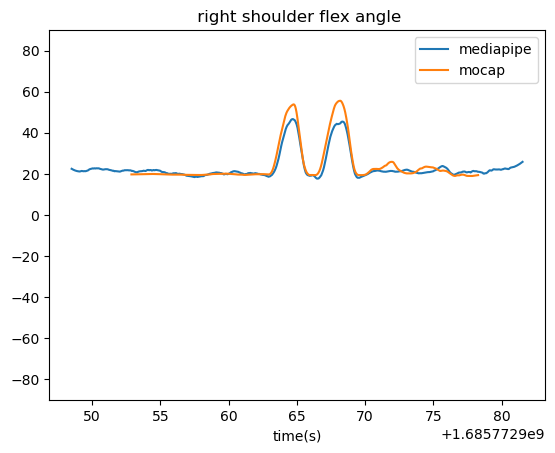

RMSE of flexangle: 3.051628756187666


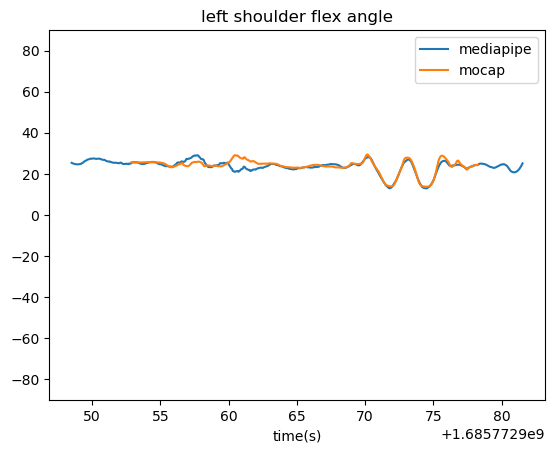

RMSE of flexangle: 1.825068246331641


In [12]:
#flexangle using elbow point projection onto saggital plane then angle between point below shoulder, shoulder, elbow projection
mpipeRightflexangle=[]
mocapRightflexangle=[]


for i in range(len(df_mpipe['epoch_time'])):
    orthplane=sag_plane([[df_mpipe['tr_x'][i],df_mpipe['tr_y'][i],df_mpipe['tr_z'][i]],
                         [df_mpipe['rs_x'][i],df_mpipe['rs_y'][i],df_mpipe['rs_z'][i]],
                         [df_mpipe['ls_x'][i],df_mpipe['ls_y'][i],df_mpipe['ls_z'][i]]])
    projection1=project_onto_plane([df_mpipe['re_x'][i],df_mpipe['re_y'][i],df_mpipe['re_z'][i]],orthplane)
    mpipeRightflexangle.append(angle3point([orthplane[2][0]-df_mpipe['rs_x'][i],orthplane[2][1]-df_mpipe['rs_y'][i],orthplane[2][2]-df_mpipe['rs_z'][i]],
                                 [df_mpipe['rs_x'][i],df_mpipe['rs_y'][i],df_mpipe['rs_z'][i]],projection1))

for i in range(len(df_mocap['epoch_time'])):
    orthplane=sag_plane([[df_mocap['tr_x'][i],df_mocap['tr_y'][i],df_mocap['tr_z'][i]],
                         [df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],
                         [df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]]])
    projection1=project_onto_plane([df_mocap['re_x'][i],df_mocap['re_y'][i],df_mocap['re_z'][i]],orthplane)
    mocapRightflexangle.append(angle3point([orthplane[2][0]-df_mocap['rs_x'][i],orthplane[2][1]-df_mocap['rs_y'][i],orthplane[2][2]-df_mocap['rs_z'][i]],
                                 [df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],projection1))

pvt(mpipeRightflexangle,df_mpipe['epoch_time'])
pvt(mocapRightflexangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title(' right shoulder flex angle')
plt.ylim(-90,90)
plt.show()

print('RMSE of flexangle:',RMSE(mocapRightflexangle,mpipeRightflexangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

mpipeLeftflexangle=[]
mocapLeftflexangle=[]

for i in range(len(df_mpipe['epoch_time'])):
    orthplane=sag_plane([[df_mpipe['tr_x'][i],df_mpipe['tr_y'][i],df_mpipe['tr_z'][i]],
                         [df_mpipe['rs_x'][i],df_mpipe['rs_y'][i],df_mpipe['rs_z'][i]],
                         [df_mpipe['ls_x'][i],df_mpipe['ls_y'][i],df_mpipe['ls_z'][i]]])
    projection1=project_onto_plane([df_mpipe['le_x'][i],df_mpipe['le_y'][i],df_mpipe['le_z'][i]],orthplane)
    mpipeLeftflexangle.append(angle3point([orthplane[2][0]-df_mpipe['ls_x'][i],orthplane[2][1]-df_mpipe['ls_y'][i],orthplane[2][2]-df_mpipe['ls_z'][i]],
                                 [df_mpipe['ls_x'][i],df_mpipe['ls_y'][i],df_mpipe['ls_z'][i]],projection1))

for i in range(len(df_mocap['epoch_time'])):
    orthplane=sag_plane([[df_mocap['tr_x'][i],df_mocap['tr_y'][i],df_mocap['tr_z'][i]],
                         [df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],
                         [df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]]])
    projection1=project_onto_plane([df_mocap['le_x'][i],df_mocap['le_y'][i],df_mocap['le_z'][i]],orthplane)
    mocapLeftflexangle.append(angle3point([orthplane[2][0]-df_mocap['ls_x'][i],orthplane[2][1]-df_mocap['ls_y'][i],orthplane[2][2]-df_mocap['ls_z'][i]],
                                 [df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]],projection1))

pvt(mpipeLeftflexangle,df_mpipe['epoch_time'])
pvt(mocapLeftflexangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('left shoulder flex angle')
plt.ylim(-90,90)
plt.show()


print('RMSE of flexangle:',RMSE(mocapLeftflexangle,mpipeLeftflexangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))


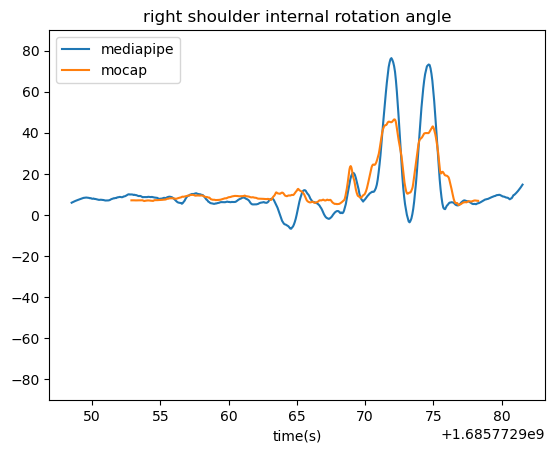

RMSE of internal rotion angle: 8.9447272854503


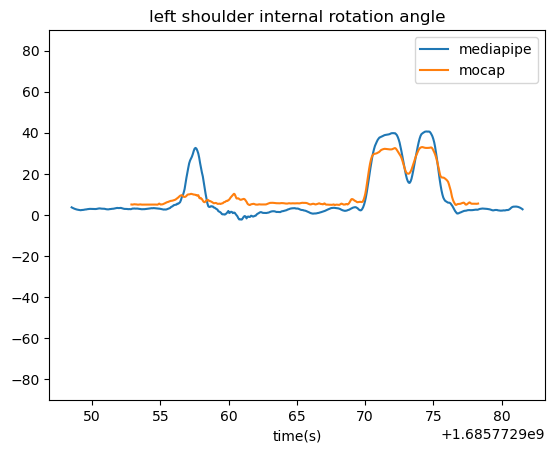

RMSE of internal rotion angle: 5.991315690111586


In [13]:
# int rot: find ref vec perp to frontal noramal and ua. project wrist onto plane containing e, e+nv,e+rv. angle between projection,e,rv

mpipeRightintrangle=[]
mocapRightintrangle=[]


for i in range(len(df_mpipe['epoch_time'])):
    v1=np.array([df_mpipe['tr_x'][i]-df_mpipe['rs_x'][i],df_mpipe['tr_y'][i]-df_mpipe['rs_y'][i],df_mpipe['tr_z'][i]-df_mpipe['rs_z'][i]])
    v2=np.array([df_mpipe['ls_x'][i]-df_mpipe['rs_x'][i],df_mpipe['ls_y'][i]-df_mpipe['rs_y'][i],df_mpipe['ls_z'][i]-df_mpipe['rs_z'][i]])
    uav=np.array([df_mpipe['rs_x'][i]-df_mpipe['re_x'][i],df_mpipe['rs_y'][i]-df_mpipe['re_y'][i],df_mpipe['rs_z'][i]-df_mpipe['re_z'][i]])
    nv=np.cross(v1,v2)
    rv=np.cross(nv,uav)
    orthplane=[[df_mpipe['re_x'][i],df_mpipe['re_y'][i],df_mpipe['re_z'][i]],
               [df_mpipe['re_x'][i]+rv[0],df_mpipe['re_y'][i]+rv[1],df_mpipe['re_z'][i]+rv[2]],
               [df_mpipe['re_x'][i]+nv[0],df_mpipe['re_y'][i]+nv[1],df_mpipe['re_z'][i]+nv[2]]]
                
    projection1=project_onto_plane([df_mpipe['rw_x'][i],df_mpipe['rw_y'][i],df_mpipe['rw_z'][i]],orthplane)
    mpipeRightintrangle.append(angle3point([df_mpipe['re_x'][i]+rv[0],df_mpipe['re_y'][i]+rv[1],df_mpipe['re_z'][i]+rv[2]],
                                           [df_mpipe['re_x'][i],df_mpipe['re_y'][i],df_mpipe['re_z'][i]],projection1)-90)

for i in range(len(df_mocap['epoch_time'])):
    v1=np.array([df_mocap['tr_x'][i]-df_mocap['rs_x'][i],df_mocap['tr_y'][i]-df_mocap['rs_y'][i],df_mocap['tr_z'][i]-df_mocap['rs_z'][i]])
    v2=np.array([df_mocap['ls_x'][i]-df_mocap['rs_x'][i],df_mocap['ls_y'][i]-df_mocap['rs_y'][i],df_mocap['ls_z'][i]-df_mocap['rs_z'][i]])
    uav=np.array([df_mocap['rs_x'][i]-df_mocap['re_x'][i],df_mocap['rs_y'][i]-df_mocap['re_y'][i],df_mocap['rs_z'][i]-df_mocap['re_z'][i]])
    nv=np.cross(v1,v2)
    rv=np.cross(nv,uav)
    orthplane=[[df_mocap['re_x'][i],df_mocap['re_y'][i],df_mocap['re_z'][i]],
               [df_mocap['re_x'][i]+rv[0],df_mocap['re_y'][i]+rv[1],df_mocap['re_z'][i]+rv[2]],
               [df_mocap['re_x'][i]+nv[0],df_mocap['re_y'][i]+nv[1],df_mocap['re_z'][i]+nv[2]]]
               
    projection1=project_onto_plane([df_mocap['rw_x'][i],df_mocap['rw_y'][i],df_mocap['rw_z'][i]],orthplane)
    mocapRightintrangle.append(angle3point([df_mocap['re_x'][i]+rv[0],df_mocap['re_y'][i]+rv[1],df_mocap['re_z'][i]+rv[2]],
                                           [df_mocap['re_x'][i],df_mocap['re_y'][i],df_mocap['re_z'][i]],projection1)-90)


pvt(mpipeRightintrangle,df_mpipe['epoch_time'])
pvt(mocapRightintrangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('right shoulder internal rotation angle')
plt.ylim(-90,90)
plt.show()

print('RMSE of internal rotion angle:',RMSE(mocapRightintrangle,mpipeRightintrangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

mpipeLeftintrangle=[]
mocapLeftintrangle=[]

for i in range(len(df_mpipe['epoch_time'])):
    v1=np.array([df_mpipe['tr_x'][i]-df_mpipe['ls_x'][i],df_mpipe['tr_y'][i]-df_mpipe['ls_y'][i],df_mpipe['tr_z'][i]-df_mpipe['ls_z'][i]])
    v2=np.array([df_mpipe['rs_x'][i]-df_mpipe['ls_x'][i],df_mpipe['rs_y'][i]-df_mpipe['ls_y'][i],df_mpipe['rs_z'][i]-df_mpipe['ls_z'][i]])
    uav=np.array([df_mpipe['ls_x'][i]-df_mpipe['le_x'][i],df_mpipe['ls_y'][i]-df_mpipe['le_y'][i],df_mpipe['ls_z'][i]-df_mpipe['le_z'][i]])
    nv=np.cross(v1,v2)
    rv=np.cross(nv,uav)
    orthplane=[[df_mpipe['le_x'][i],df_mpipe['le_y'][i],df_mpipe['le_z'][i]],
               [df_mpipe['le_x'][i]+rv[0],df_mpipe['le_y'][i]+rv[1],df_mpipe['le_z'][i]+rv[2]],
               [df_mpipe['le_x'][i]+nv[0],df_mpipe['le_y'][i]+nv[1],df_mpipe['le_z'][i]+nv[2]]]
               
    projection1=project_onto_plane([df_mpipe['lw_x'][i],df_mpipe['lw_y'][i],df_mpipe['lw_z'][i]],orthplane)
    mpipeLeftintrangle.append(angle3point([df_mpipe['le_x'][i]+rv[0],df_mpipe['le_y'][i]+rv[1],df_mpipe['le_z'][i]+rv[2]],
                                           [df_mpipe['le_x'][i],df_mpipe['le_y'][i],df_mpipe['le_z'][i]],projection1)-90)

for i in range(len(df_mocap['epoch_time'])):
    v1=np.array([df_mocap['tr_x'][i]-df_mocap['ls_x'][i],df_mocap['tr_y'][i]-df_mocap['ls_y'][i],df_mocap['tr_z'][i]-df_mocap['ls_z'][i]])
    v2=np.array([df_mocap['rs_x'][i]-df_mocap['ls_x'][i],df_mocap['rs_y'][i]-df_mocap['ls_y'][i],df_mocap['rs_z'][i]-df_mocap['ls_z'][i]])
    uav=np.array([df_mocap['ls_x'][i]-df_mocap['le_x'][i],df_mocap['ls_y'][i]-df_mocap['le_y'][i],df_mocap['ls_z'][i]-df_mocap['le_z'][i]])
    nv=np.cross(v1,v2)
    rv=np.cross(nv,uav)
    orthplane=[[df_mocap['le_x'][i],df_mocap['le_y'][i],df_mocap['le_z'][i]],
               [df_mocap['le_x'][i]+rv[0],df_mocap['le_y'][i]+rv[1],df_mocap['le_z'][i]+rv[2]],
               [df_mocap['le_x'][i]+nv[0],df_mocap['le_y'][i]+nv[1],df_mocap['le_z'][i]+nv[2]]]
               
    projection1=project_onto_plane([df_mocap['lw_x'][i],df_mocap['lw_y'][i],df_mocap['lw_z'][i]],orthplane)
    mocapLeftintrangle.append(angle3point([df_mocap['le_x'][i]+rv[0],df_mocap['le_y'][i]+rv[1],df_mocap['le_z'][i]+rv[2]],
                                           [df_mocap['le_x'][i],df_mocap['le_y'][i],df_mocap['le_z'][i]],projection1)-90)

pvt(mpipeLeftintrangle,df_mpipe['epoch_time'])
pvt(mocapLeftintrangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('left shoulder internal rotation angle')
plt.ylim(-90,90)
plt.show()

print('RMSE of internal rotion angle:',RMSE(mocapLeftintrangle,mpipeLeftintrangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

t1 4.64 3.98 3.29 3.01 11.4 6.68

eu 2.67 7.99 7.25 4.79 9.00 21.1

t2 6.20 4.06 3.05 1.82 8.94 5.99

eu 2.45 3.75 2.65 2.70 9.67 21.1